In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
import pandas as pd

tsla_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/TSLA_data1.csv')
ndxl_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/NDXL_Normalised_OHLC_VWAP_VOL.csv')
tsla_norm_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/TSLA_Normalised_OHLC_VWAP_VOL.csv')


In [13]:
tsla_norm_data.loc[tsla_norm_data['Close_Price'] == 0, 'Close_Price'] = None
tsla_norm_data['Close_Price'] = tsla_norm_data['Close_Price'].ffill()

tsla_norm_data['Daily_Return'] = tsla_norm_data['Close_Price'].pct_change()

tsla_norm_data['Daily_Return'] = tsla_norm_data['Daily_Return'].replace([np.inf, -np.inf], np.nan)
tsla_norm_data['Daily_Return'] = tsla_norm_data['Daily_Return'].fillna(0)  

drift = tsla_norm_data['Daily_Return'].mean()

volatility = tsla_norm_data['Daily_Return'].std()

print(f"Drift (Average Return): {drift:.6f}")
print(f"Volatility (Standard Deviation): {volatility:.6f}")


Drift (Average Return): 0.005140
Volatility (Standard Deviation): 0.078022


In [74]:
time_horizons = [21, 63, 252, 1260]  
labels = ["1 Month", "3 Months", "1 Year", "5 Years"]


In [75]:

S0 = tsla_norm_data['Close_Price'].iloc[-1]  
N = 10000  


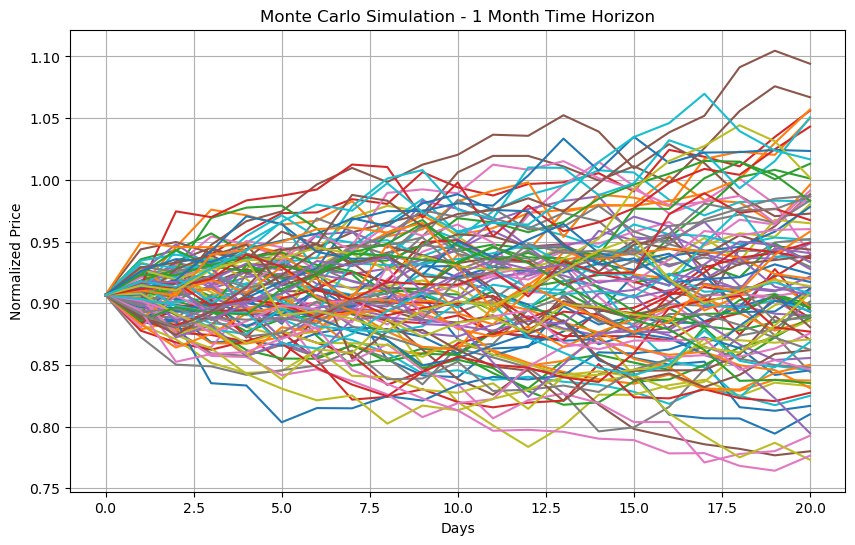

1 Month Summary:
  Expected Final Price (Mean): 0.9114
  Standard Deviation of Final Prices: 0.0688


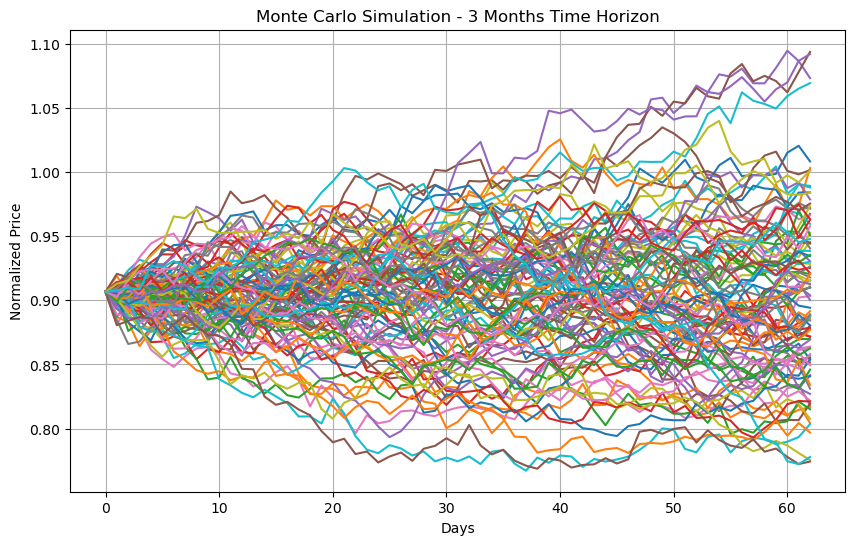

3 Months Summary:
  Expected Final Price (Mean): 0.9112
  Standard Deviation of Final Prices: 0.0696


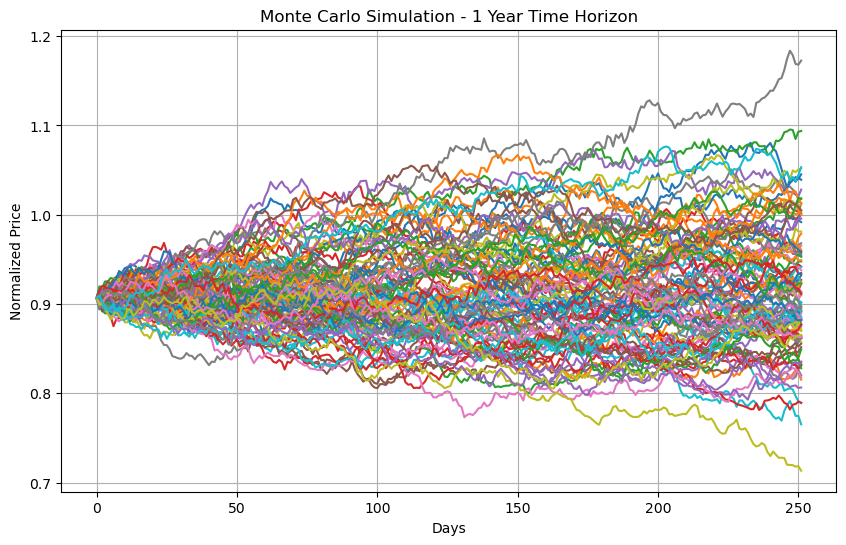

1 Year Summary:
  Expected Final Price (Mean): 0.9107
  Standard Deviation of Final Prices: 0.0705


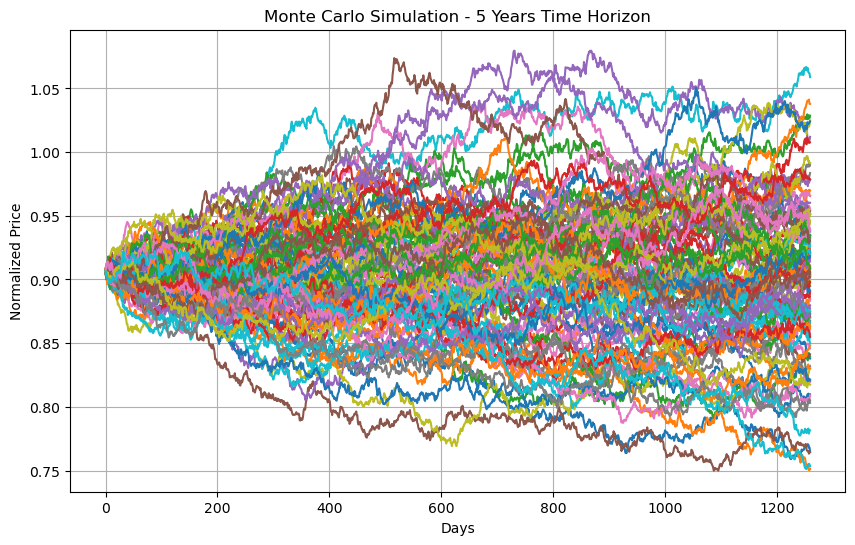

5 Years Summary:
  Expected Final Price (Mean): 0.9115
  Standard Deviation of Final Prices: 0.0705


In [76]:
mean_prices = []
std_dev_prices = []

output_dir = "/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Simulation_Results/"
os.makedirs(output_dir, exist_ok=True)  

for T, label in zip(time_horizons, labels):
    dt = 1 / T  
    price_paths = np.zeros((T, N))  
    price_paths[0] = S0  
    
    for t in range(1, T):
        random_shocks = np.random.normal(0, 1, N)  
        price_paths[t] = price_paths[t - 1] * np.exp(
            (drift - 0.5 * volatility**2) * dt + volatility * random_shocks * np.sqrt(dt)
        )

    final_prices = price_paths[-1]
    mean_price = np.mean(final_prices)
    std_dev_price = np.std(final_prices)

    mean_prices.append(mean_price)
    std_dev_prices.append(std_dev_price)

    plt.figure(figsize=(10, 6))
    plt.plot(price_paths[:, :100])  # Plot first 100 paths for clarity
    plt.title(f"Monte Carlo Simulation - {label} Time Horizon")
    plt.xlabel("Days")
    plt.ylabel("Normalized Price")
    plt.grid(True)
    plot_filename = f"{label.replace(' ', '_')}_Price_Paths.png"
    plt.savefig(os.path.join(output_dir, plot_filename))
    plt.show()  

    
    print(f"{label} Summary:")
    print(f"  Expected Final Price (Mean): {mean_price:.4f}")
    print(f"  Standard Deviation of Final Prices: {std_dev_price:.4f}")
